In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting
import scipy
import cv2 as cv

In [3]:
from helper import *

In [4]:
plotting.BACKEND = 'matplotlib'
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['image.cmap'] = "turbo"

## Graphs

A graph is defined as:
$$ \mathcal{G} = \{ \mathcal{V}, \mathcal{E}, W \} $$

* $\mathcal{V}$: set of vertices with $|\mathcal{V}|=N$
* $\mathcal{E}$: set of edges with an edge $e = (i,j)$ connecting vertices $i$ and $j$
* $W$: weighted adjacency matrix with $W_{i,j}$ edge weight for an edge, o.w. it's equal to $0$

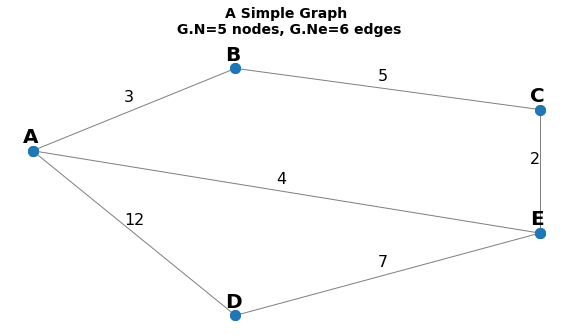

V - set of vertices :
['A', 'B', 'C', 'D', 'E'] 

E - set of edges : 
[(0, 1), (0, 3), (0, 4), (1, 0), (1, 2), (2, 1), (2, 4), (3, 0), (3, 4), (4, 0), (4, 2), (4, 3)] 

W - weighted adjacency matrix :
[[ 0  3  0 12  4]
 [ 3  0  5  0  0]
 [ 0  5  0  0  2]
 [12  0  0  0  7]
 [ 4  0  2  7  0]] 



In [5]:
W = np.array([
    [0,3,0,12,4],
    [3,0,5,0,0],
    [0,5,0,0,2],
    [12,0,0,0,7],
    [4,0,2,7,0]
])
G = graphs.Graph(W)
myGraphPlot(G,  
            coords = [[0,5], [2,7], [5,6], [2,1], [5,3]],
            vertex_names=["A", "B", "C", "D", "E"],
            title = "A Simple Graph",
            display_vertexnames = True,
            display_edgeweights = True,
            print_graph_info=True)

### Graph Construction Methods

* Gaussian Kernel Weighting function
$$
    W_{i,j} = \begin{cases}
        \exp (-\frac{[dist(i,j)]^2}{2\theta^2}), & \text{if} \: dist(i,j)\leq \mathcal{K} \\
        0, & \text{o.w.}
    \end{cases}
$$

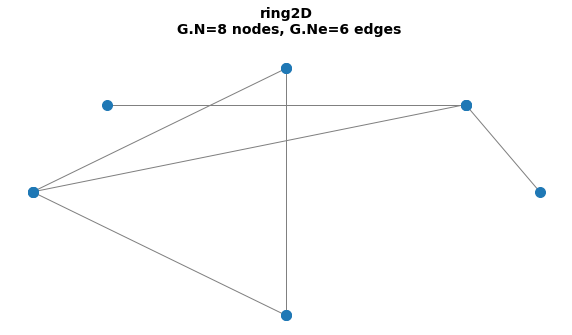

In [99]:
N = 8
K = 0.93
rs = np.random.RandomState(42)
W = rs.uniform(size=(N,N))
W[W < K] = 0
W = W + W.T
np.fill_diagonal(W, 0)
G = graphs.Graph(W)
myGraphPlot(G, print_graph_info=False)

* Edges from K-Nearest Neighbors method

In [100]:
places = [
    [2,3],
    [32,2],
    [33,1],
    [2,54],
    [32,32],
    [12,34]
]
for i in places:
    print(i)
    #plt.text(i[0], i[1], "Hey")
    
plt.show()
print("\n---TODO: to be implemented later---")

[2, 3]
[32, 2]
[33, 1]
[2, 54]
[32, 32]
[12, 34]

---TODO: to be implemented later---


### Graph Examples

2023-03-03 22:01:32,967:[INFO](pygsp.graphs.community.__init__): Constructed using eps-NN with eps = 2.8284271247461903
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


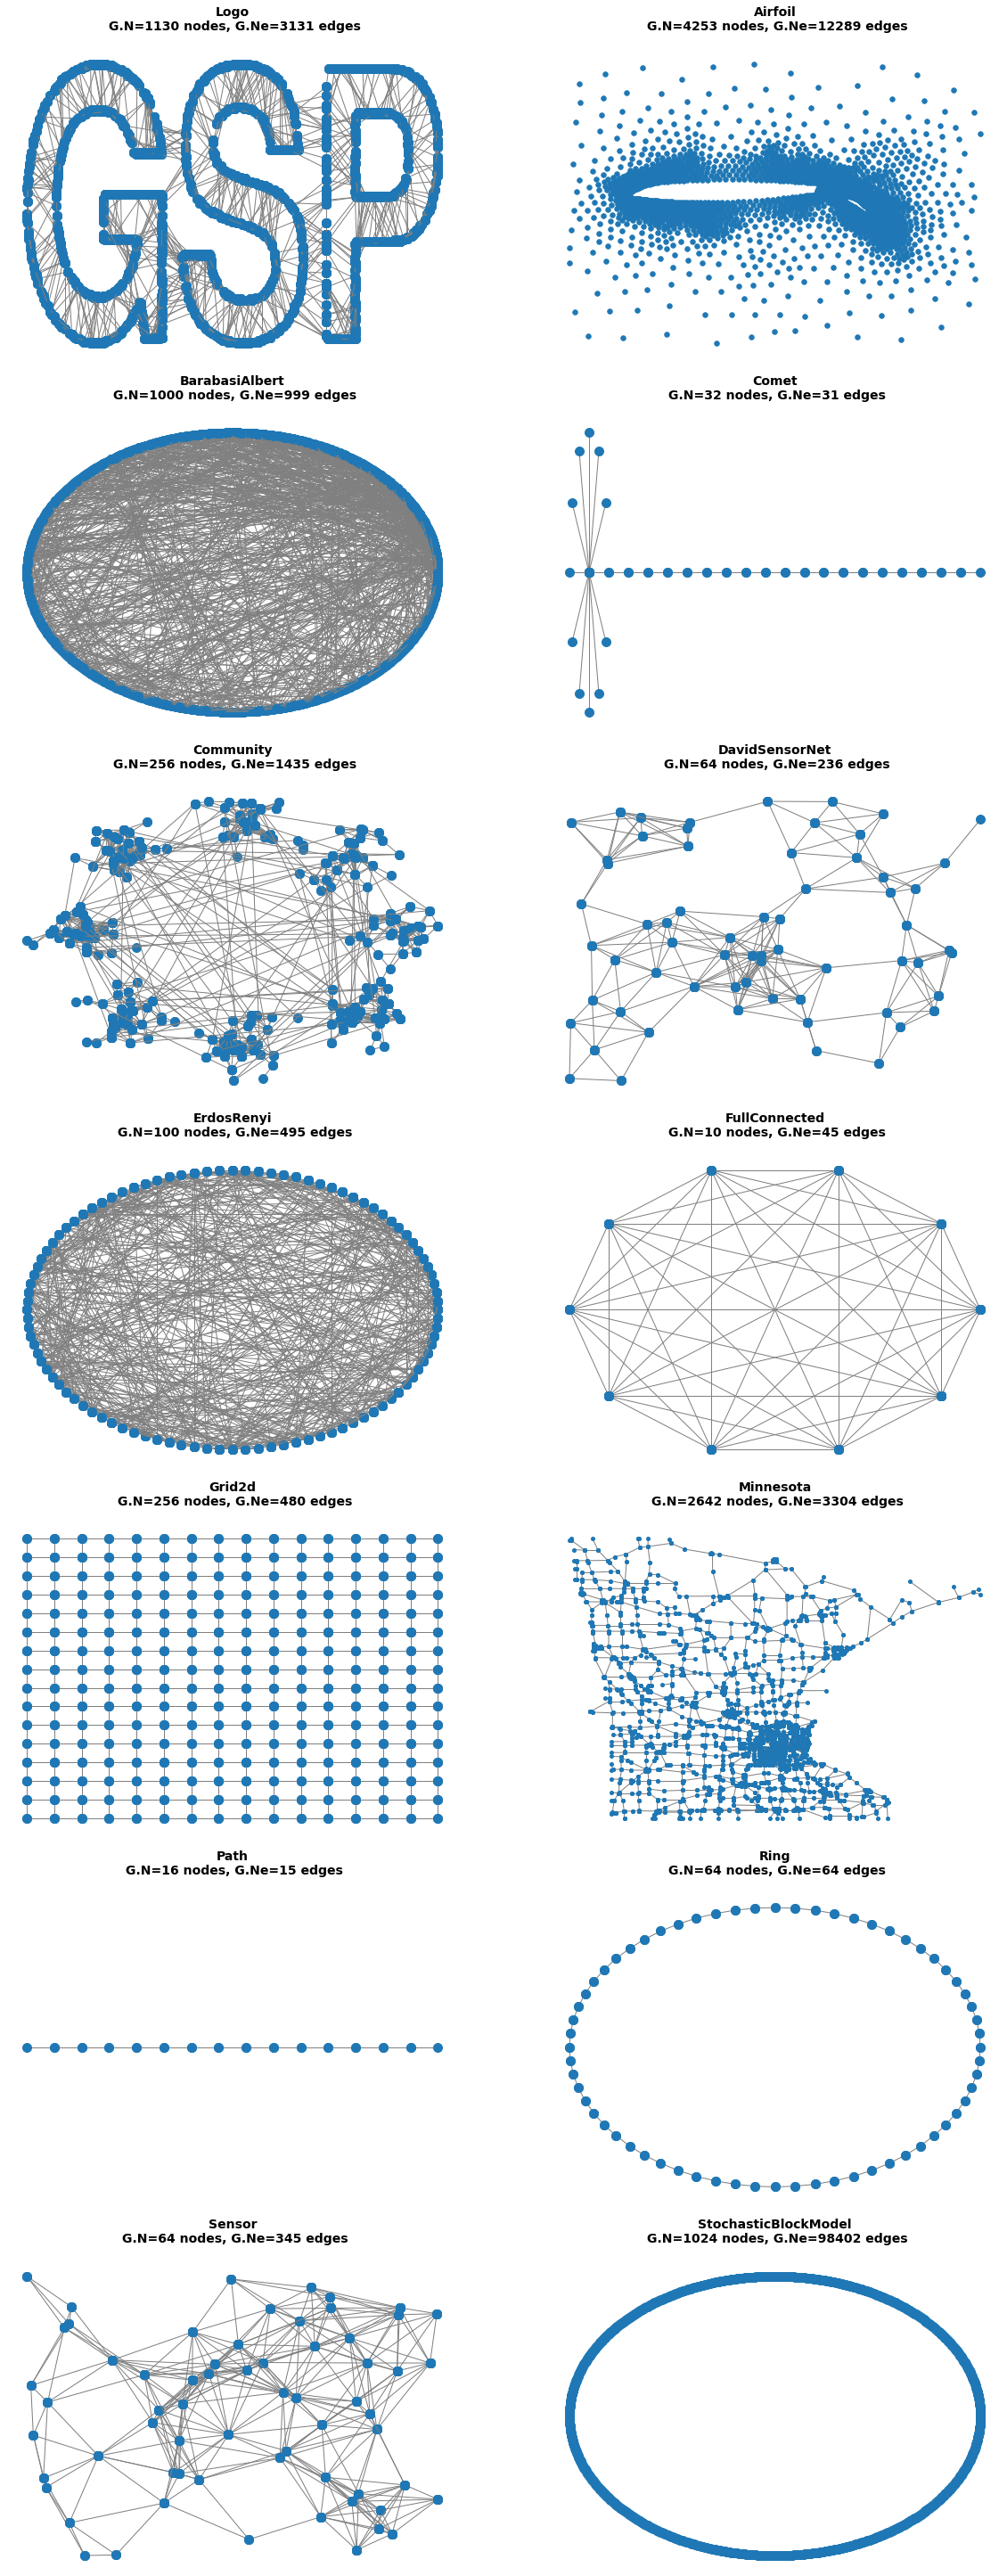

In [101]:
Gs = [graphs.Logo(),
      graphs.Airfoil(),
      graphs.BarabasiAlbert(),
      graphs.Comet(),
      graphs.Community(),
      graphs.DavidSensorNet(),
      graphs.ErdosRenyi(),
      graphs.FullConnected(),
      graphs.Grid2d(),
      graphs.Minnesota(),
      graphs.Path(),
      graphs.Ring(),
      graphs.Sensor(),
      graphs.StochasticBlockModel(),
      graphs.SwissRoll(),
      graphs.Torus()
    ]

Gtitles = ["Logo",
           "Airfoil",
           "BarabasiAlbert",
           "Comet",
           "Community",
           "DavidSensorNet",
           "ErdosRenyi",
           "FullConnected",
           "Grid2d",
           "Minnesota",
           "Path",
           "Ring",
           "Sensor",
           "StochasticBlockModel",
           "SwissRoll",
           "Torus"
          ]

fig, axes = plt.subplots(7,2, figsize=(20,52))

for i in range(7):
    for j in range(2):
        myGraphPlot(Gs[i*2+j],  
                    title = Gtitles[i*2+j], 
                    ax=axes[i,j])
plt.show()

## Graph Signals

$$
\mathcal{G} = \{ \mathcal{V}, \mathcal{E}, W \}
$$
with 
$$
f : \mathcal{V} \rightarrow \mathbb{R}
$$
Then,
$$
\textbf{f} \in \mathbb{R}^N
$$
with $|\mathcal{V}| = N$, i.e. number of vertices in the graph $\mathcal{G}$.

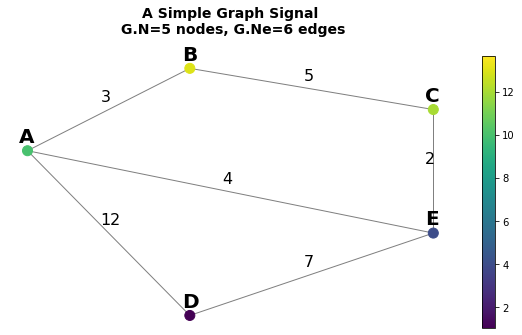

In [102]:
W = np.array([
    [0,3,0,12,4],
    [3,0,5,0,0],
    [0,5,0,0,2],
    [12,0,0,0,7],
    [4,0,2,7,0]
])
G = graphs.Graph(W)
myGraphPlotSignal(G, 
            s = np.array([10,13,12,1,4]),
            coords = [[0,5], [2,7], [5,6], [2,1], [5,3]],
            vertex_names=["A", "B", "C", "D", "E"],
            title = "A Simple Graph Signal",
            display_vertexnames = True,
            display_edgeweights = True)

## Graph Laplacian

$$
Ł : \mathbb{R}^N \rightarrow \mathbb{R}^N
$$
<br>
$$
(Łf)(i) = \sum_{j \in \mathcal{N}_i} W_{i,j} [f(i)-f(j)]
$$
where $\mathcal{N}_i$ is the set of vertices connected to vertex $i$ by an edge

<br>
This operator can be represented by a matrix:
$$
Ł = D - W
$$
where $D$ is a degree matrix which is a diagonal element whose $i^{th}$ is $d_i = \sum_{j=1}^{N}$

$$
L_{i,j} = \begin{cases}
d_i, & \text{if } \: i=j \\
-W_{i,j} & \text{if $i\neq j$ and $v_i$ adjacent to $v_j$} \\
0, & \text{o.w.}
\end{cases}
$$

So, $Ł$ is a real symmetric matrix. It has a complete set of orthonormal eigenvectors: $\{u_l\}_{l=0,1,...,N-1}$

$$
Łu_l = \lambda_l u_l
$$
Also, the corresponding set of eigenvalues is $\{\lambda_l\}_{l=0,1,...,N-1}$. Assume it's ordered from $0=\lambda_0$ to $\lambda_{N-1}=\lambda_{max}$. Then, the eigendecomposition can be written as follows:

$$
Ł = U \Lambda U^T
$$
where $\Lambda = \text{diag}(\lambda_0,...,\lambda_{N-1})$.

**Note:** Graph Laplacian is a difference operator.

## Graph Fourier Transform

Graph Fourier transform is defined as:

$$
\hat{f}(\lambda_l) = < f, u_l > = \sum_{i \in \mathcal{V}} f(i) u^*_l(i)
$$

Inverse graph Fourier transform is defined as:
$$
f(i) = \sum_{l=0}^{N-1} \hat{f}(\lambda_l) u_{l}(i)
$$

These two transforms can be represented by matrices $U^T$ and $U$, respectively, where the columns of $U$ are eigenvectors of graph Laplacian operators, $\{u_l(i)\}_{i\in \mathcal{V}}$.

**Note:**
* Graph Laplacian eigenvectors and eigenvectors provide a notion of frequency.
    * Eigenvectors associated to higher eigenvalues oscillate more rapidly

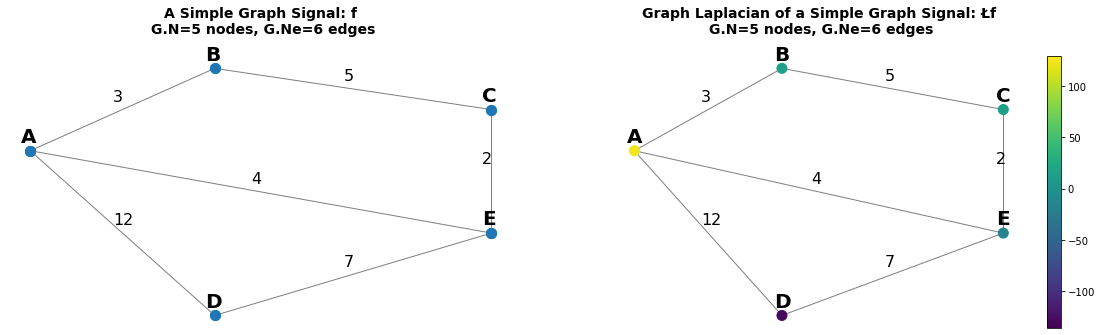

Set of ordered eigenvectors gives Fourier basis:  True 

First eigenvector corresponding: v_0 =  [0.4472136 0.4472136 0.4472136 0.4472136 0.4472136] , where 1/sqrt(5) = 0.4472135954999579 
	It also corresponds to eigenvalue lambda_0= -1.894401462684982e-16 

Proof of Orthonormality of Fourier basis:
	<u_0,u_0> = 1	
	<u_1,u_0> = 0	<u_1,u_1> = 1	
	<u_2,u_0> = 0	<u_2,u_1> = 0	<u_2,u_2> = 1	
	<u_3,u_0> = 0	<u_3,u_1> = 0	<u_3,u_2> = 0	<u_3,u_3> = 1	
	<u_4,u_0> = 0	<u_4,u_1> = 0	<u_4,u_2> = 0	<u_4,u_3> = 0	<u_4,u_4> = 1	


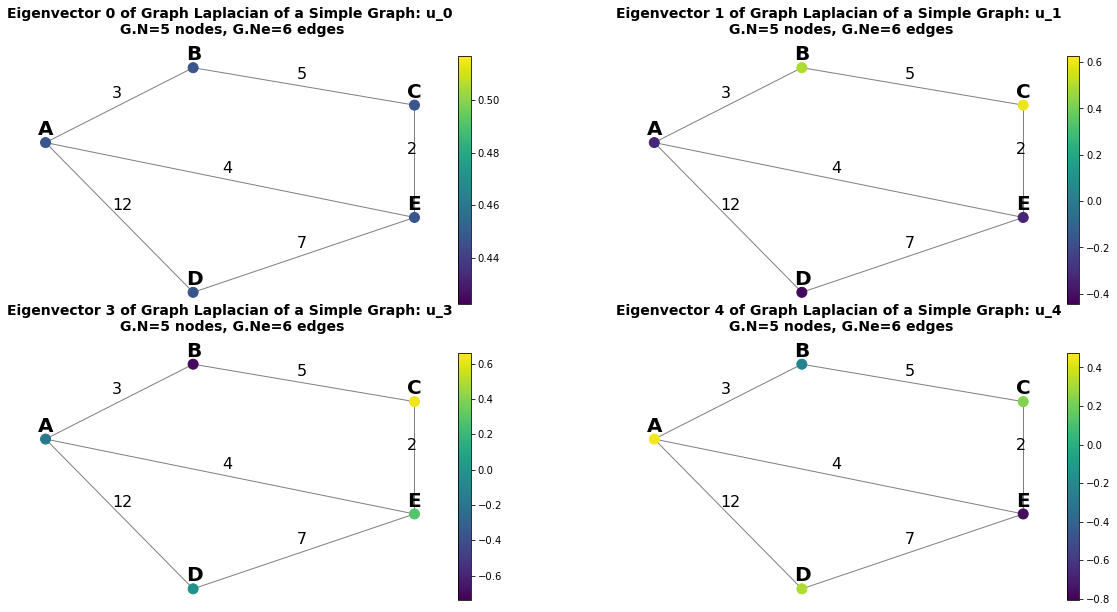

In [103]:
W = np.array([
    [0,3,0,12,4],
    [3,0,5,0,0],
    [0,5,0,0,2],
    [12,0,0,0,7],
    [4,0,2,7,0]
])
G = graphs.Graph(W)

G.compute_laplacian()
G.compute_fourier_basis()

L = G.L.toarray()
s = np.array([10,13,12,1,4])

L_s = L @ s

fig, axes = plt.subplots(1,2, figsize=(20,5))

myGraphPlot(G,  
            coords = [[0,5], [2,7], [5,6], [2,1], [5,3]],
            vertex_names=["A", "B", "C", "D", "E"],
            title = "A Simple Graph Signal: f",
            display_vertexnames = True,
            display_edgeweights = True,
            ax=axes[0])

myGraphPlotSignal(G, 
            s = L_s,
            coords = [[0,5], [2,7], [5,6], [2,1], [5,3]],
            vertex_names=["A", "B", "C", "D", "E"],
            title = "Graph Laplacian of a Simple Graph Signal: Łf",
            display_vertexnames = True,
            display_edgeweights = True,
            ax=axes[1])
plt.show()

Lamb, U = np.linalg.eig(L)
sort_inds = np.argsort(Lamb)
Lamb = Lamb[sort_inds]
U = U[:,sort_inds]
print("Set of ordered eigenvectors gives Fourier basis: ", (np.abs(U-G.U)<1e-15).all(), "\n")
print("First eigenvector corresponding: v_0 = ", U[:,0], ", where 1/sqrt(5) =", 1/np.sqrt(5), "\n\tIt also corresponds to eigenvalue lambda_0=", Lamb[0], "\n")

print("Proof of Orthonormality of Fourier basis:")
for i in range(5):
    print("\t", end="")
    for j in range(i+1):
        res = np.inner(U[:,i], U[:,j])
        if np.abs(res)< 1e-15:
            res = 0
        elif np.abs(res-1)<1e-15:
            res = 1
        print("<u_" + str(i) + ",u_" + str(j) + "> =", res, end="\t")
    print()
    
show_inds = [0,1,3,4]

fig, axes = plt.subplots(2,2, figsize=(20,10))
for i in range(2):
    for j in range(2):
        myGraphPlotSignal(G, 
                    s = G.U[:,i*2+j],
                    coords = [[0,5], [2,7], [5,6], [2,1], [5,3]],
                    vertex_names=["A", "B", "C", "D", "E"],
                    title = "Eigenvector " + str(show_inds[i*2+j]) + " of Graph Laplacian of a Simple Graph: u_" + str(show_inds[i*2+j]),
                    display_vertexnames = True,
                    display_edgeweights = True,
                    ax=axes[i,j])
plt.show()


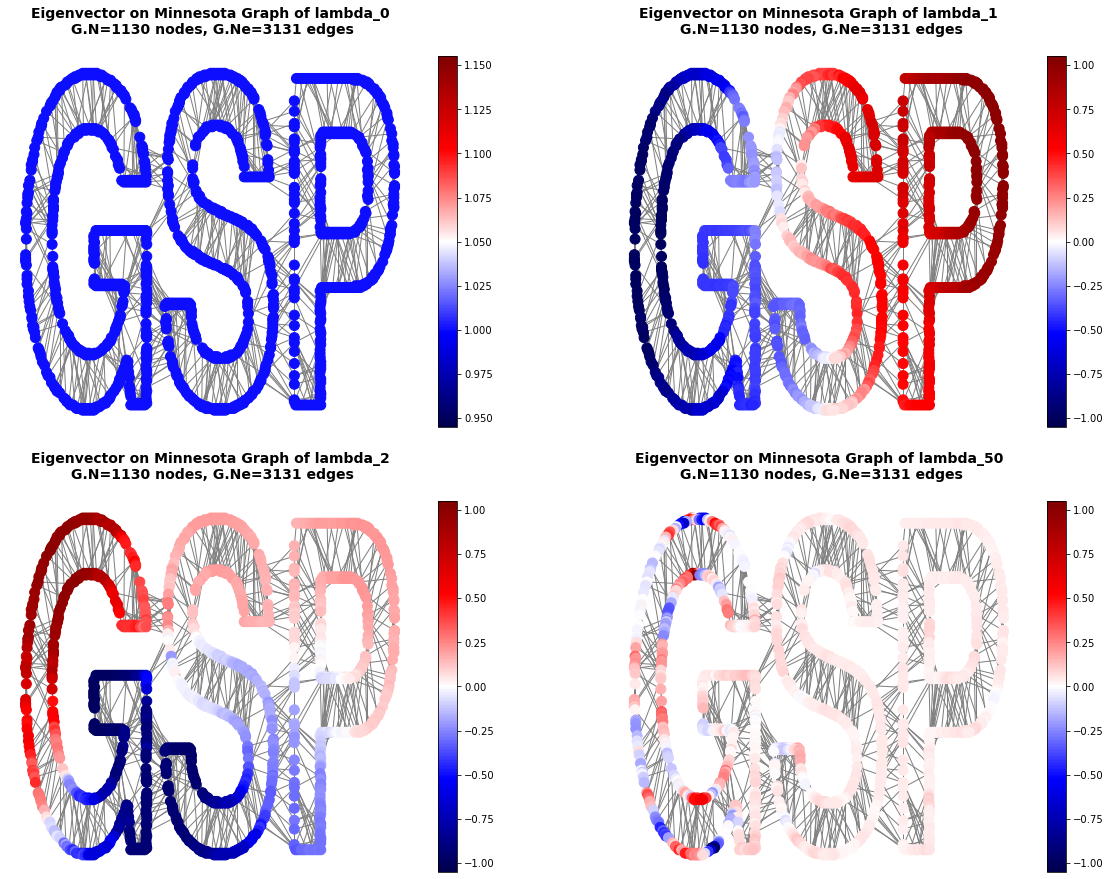

In [508]:
plt.rcParams['image.cmap'] = "seismic"
G = graphs.Logo()
G.compute_laplacian()
G.compute_fourier_basis()

inds = [0, 1, 2, 50]

fig, axes = plt.subplots(2,2, figsize=(20,15))

for i, ind in enumerate(inds):
    a = np.min(G.U[:,ind])
    b = np.max(G.U[:,ind])
    
    if ((b-a)<1e-7):
        s = np.ones_like(G.U[:,ind])
    else:
        s = (G.U[:,ind] - a)/((b - a)/2) - 1
    
    myGraphPlotSignal(G, s = s, title="Eigenvector on Minnesota Graph of lambda_" + str(ind), ax=axes[i//2,i%2])
    
plt.show()
plt.rcParams['image.cmap'] = "turbo"

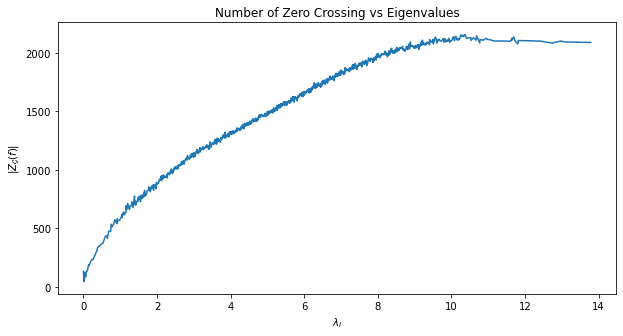

In [104]:
G = graphs.Logo()

G.compute_laplacian()
G.compute_fourier_basis()

U = G.U - np.mean(G.U, axis=0)
L = G.L.toarray()

W = G.W.toarray()
inds = np.where(W!=0)
inds = list(zip(inds[0], inds[1]))
for cord in inds:
    try:
        inds.remove((cord[1], cord[0]))
    except:
        pass

def zero_crossings(s, inds):
    res = 0
    for cord in inds:
        if (s[cord[0]]*s[cord[1]] < 0):
            res += 1
    return res

zc_s = []
for i in range(G.N):
    zc_s.append(zero_crossings(U[:,i], inds))

fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(G.e, zc_s)
ax.set_ylabel("$|Z_{\mathcal{G}}(f)|$")
ax.set_xlabel("$\lambda_l$")
ax.set_title("Number of Zero Crossing vs Eigenvalues")
plt.show()

## Heat Kernel

$$
\hat{g}(\lambda_l) = e^{-5\lambda_l}
$$
Then, inverse Fourier transform is applied to obtain the graph signal, $g(i)$:
$$
g(i) = \sum_{\lambda = 0}^{N-1} \hat{g}(\lambda_l) u_l(i)
$$

The signals that can be represented in vertex ($g$) and graph spectral domain ($\hat{g}$) are called **kernels**.

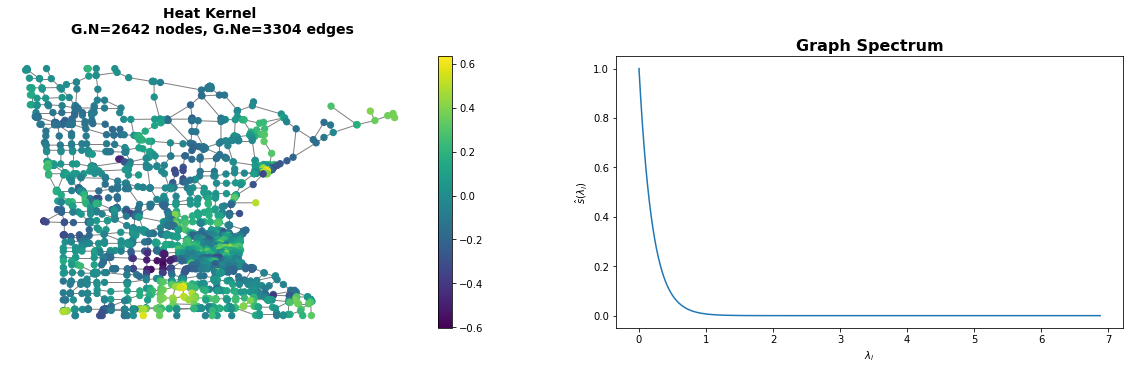

In [105]:
G = graphs.Minnesota()
G.compute_laplacian()
G.compute_fourier_basis()

s_hat = np.exp(-5*G.e)

s = G.igft(s_hat)

fig, axes = plt.subplots(1,2,figsize=(20,5))
myGraphPlotSignal(G, 
            s = s,
            title = "Heat Kernel",
            ax=axes[0])
axes[1].plot(G.e, s_hat)
axes[1].set_title("Graph Spectrum", fontsize=16, fontweight=600)
axes[1].set_xlabel("$\lambda_l$")
axes[1].set_ylabel("$\hat{s}(\lambda_l)$")
plt.show()


## Graph Signal Smoothness

* Edge derivative of $f$ with respect to edge $e=(i,j)$ at vertex $i$:

$$
\left. \frac{\partial f}{\partial e} \right\vert_i = \sqrt{W_{i,j}} [f(j)-f(i)]
$$

* Graph gradient of $f$ at vertex $i$:

$$
\nabla_i f = 
\begin{bmatrix}
\{ \frac{\partial f}{\partial e} \}_{e \in \mathcal{E} \text{ s.t. $e=(i,j)$ for some $j \in \mathcal{V}$}} 
\end{bmatrix}
$$

* **Local variation** of $f$ at vertex $i$:

$$
|| \nabla_i f ||_2 = \begin{bmatrix}
\sum_{e \in \mathcal{E} \text{ s.t. $e=(i,j)$ for some $j \in \mathcal{V}$}} (\left. \frac{\partial f}{\partial e} \right\vert_i)^2
\end{bmatrix}^{\frac{1}{2}}
$$

$$
|| \nabla_i f ||_2 = \begin{bmatrix}
\sum_{j \in \mathcal{N}_i} W_{i,j} [f(j) - f(i)]^2
\end{bmatrix}^{\frac{1}{2}}
$$

* Discrete p-Dirichlet form of $f$:

$$
S_p(f) = \frac{1}{p} \sum_{i \in \mathcal{V}} || \nabla_i f ||^p_2 = \frac{1}{p} \sum_{i \in \mathcal{V}} [\sum_{j \in \mathcal{N}_i} W_{i,j} [f(j)-f(i)]^2]^{\frac{p}{2}}
$$
This is for **global smoothness**.

   * $p=1$: total variation of the signal wrt graph
   * $p=2$:
   
$$
S_2(f) = \sum_{(i,j) \in \mathcal{E}} W_{i,j} [f(j) - f(i)]^2 = \textbf{f}^T Ł \textbf{f}
$$

**Note:** We can also define semi norm:
$$
||\textbf{f}||_Ł = ||Ł^{\frac{1}{2}} \textbf{f}||_2 = \sqrt{\textbf{f}^T Ł \textbf{f}} = \sqrt{S_2(f)}
$$

So, 

* $S_2(f)=0$ iff $f$ is constant across all vertices.

* $S_2(f)$ is small when the signal $f$ has similar values at neighboring vertices connected by an edge with a large weight, i.e. when it's smooth.

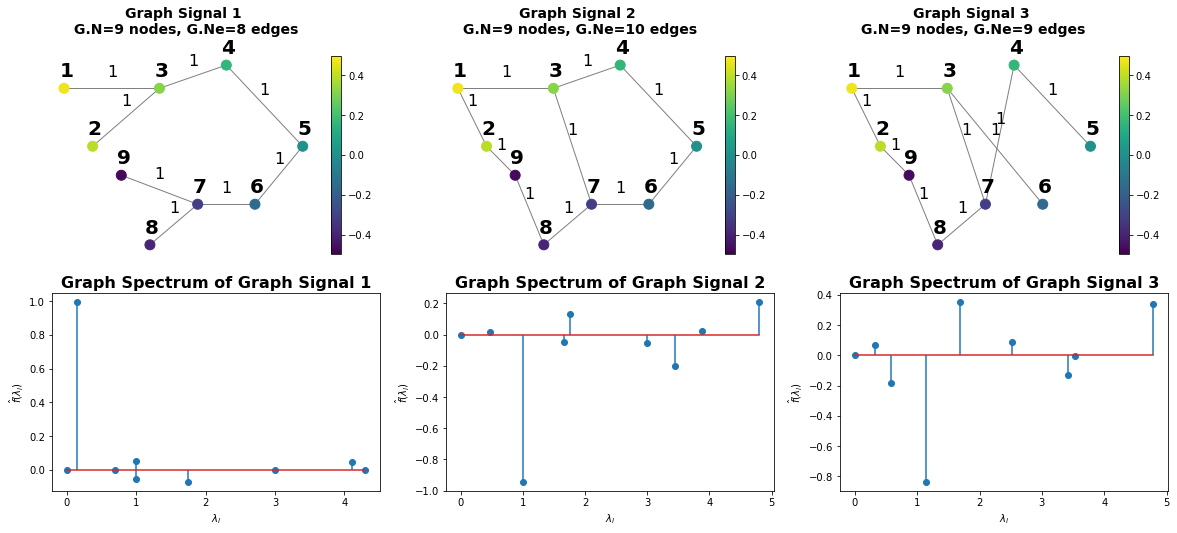

f^T L_1 f =  0.16049382716049385
f^T L_2 f =  1.2839506172839505
f^T L_3 f =  1.6543209876543208
=> Even thouugh we have the same signal values and same vertices, the difference on edges can affect the smoothness
	Here, G1 is the smoothest signal


In [93]:
coords = [
    [0,5],
    [0.6,4],
    [2,5],
    [3.4,5.4],
    [5,4],
    [4,3],
    [2.8,3],
    [1.8,2.3],
    [1.2,3.5]
]
s = np.array([6,5,4,2,0,-2,-4,-5,-6])
s = s / np.sum(s**2)**(0.5)

W1 = np.array([
    [0,0,1,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0],
    [1,1,0,1,0,0,0,0,0],
    [0,0,1,0,1,0,0,0,0],
    [0,0,0,1,0,1,0,0,0],
    [0,0,0,0,1,0,1,0,0],
    [0,0,0,0,0,1,0,1,1],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0]
])
W2 = np.array([
    [0,1,1,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,1],
    [1,0,0,1,0,0,1,0,0],
    [0,0,1,0,1,0,0,0,0],
    [0,0,0,1,0,1,0,0,0],
    [0,0,0,0,1,0,1,0,0],
    [0,0,1,0,0,1,0,1,0],
    [0,0,0,0,0,0,1,0,1],
    [0,1,0,0,0,0,0,1,0]
])
W3 = np.array([
    [0,1,1,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,1,1,0,0],
    [0,0,0,0,1,0,1,0,0],
    [0,0,0,1,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0],
    [0,0,1,1,0,0,0,1,0],
    [0,0,0,0,0,0,1,0,1],
    [0,1,0,0,0,0,0,1,0]
])


GS = [graphs.Graph(W1), graphs.Graph(W2), graphs.Graph(W3)]
fig, axes = plt.subplots(2,3, figsize=(20,8))
s2s = []
for i in range(3):
    G = GS[i]
    G.compute_laplacian()
    G.compute_fourier_basis()
    myGraphPlotSignal(G,
                s=s,
                coords = coords,
                title = "Graph Signal " + str(i+1),
                display_vertexnames = True,
                display_edgeweights = True,
                ax=axes[0,i])
    
    s_hat = G.gft(s)
    axes[1,i].stem(G.e, s_hat)
    axes[1,i].set_xlabel("$\lambda_l$")
    axes[1,i].set_ylabel("$\hat{f}(\lambda_l)$")
    axes[1,i].set_title("Graph Spectrum of Graph Signal " + str(i+1), fontsize=16, fontweight=600)
    
    L = G.L.toarray()
    s2 = s.transpose() @ (L @ s)
    s2s.append(s2)
    
plt.show()

for i in range(3):
    print("f^T L_" + str(i+1) + " f = ", s2s[i], end="\n")
    
print("=> Even thouugh we have the same signal values and same vertices, the difference on edges can affect the smoothness")
print("\tHere, G1 is the smoothest signal")

# Generalized Operators for Graph Signals

## Filtering

1. **Frequency filtering**

$$
\hat{f}_{out}(\lambda_l) = \hat{f}_{in}(\lambda_l) \hat{h}(\lambda_l)
$$
$$
\longleftrightarrow
$$
$$
f_{out}(i) = \sum_{l=0}^{N-1} \hat{f}_{in} (\lambda_l) \hat{h}(\lambda_l) u_l(i)
$$

This multiplication property in graph spectral domain results in the following equation:

$$
f_{out} = \hat{h}(Ł) f_{in}
$$
where 
$$
\hat{h}(Ł) = U \begin{bmatrix}
\hat{h}(\lambda_0) & ... & 0 \\
... & ... & ... \\
0 & ... & \hat{h}(\lambda_{N-1})
\end{bmatrix} U^T
$$

The basic graph spectral filtering can be used to implement discrete versions of well-known continuous filtering techniques. In particular, many of these filters arise as solutions to variational problems to regularize ill-posed inverse problems such as denoising, inpainting and super-resolution. One example is the discrete regularization framework

$$
    \min_{\textbf{f}} \{ ||\textbf{f}-\textbf{y}||_2^2 + \gamma S_p(\textbf{f})\}
$$

**Example - Tikhonov Regularization:**

We observe a noisy graph signal $\textbf{y}=\textbf{f}_0+\eta$, where $\eta$ is uncorrelated additive Gaussian noise and we wish to recover $\textbf{f}_0$. To enforce a priori information that $\textbf{f}_0$ is smooth, we include a regularization form $\textbf{f}^T Ł \textbf{f}$:

$$
    \min_{\textbf{f}} \{ ||\textbf{f}-\textbf{y}||_2^2 + \gamma \textbf{f}^T Ł \textbf{f}\}
$$

The first-order optimality conditions of the convex objective function show that the optimal reconstruction is given by
$$
f_* (i) = \sum^{N-1}_{l=0} \begin{bmatrix} \frac{1}{1 + \gamma \lambda_l} \end{bmatrix} \hat{y}(\lambda_l) u_l(i)
$$
or, equivalently, $\textbf{f} = \hat{h}(Ł) \textbf{y}$, where $\hat{h}(\lambda) = \frac{1}{1+ \gamma \lambda}$ can be viewed as a low-pass filter.

**Pf:**

The objective function in the minimization problem is convex. Therefore, the problem can be solved by the first-order optimality condition, which is
* Take the derivative of the objective function
* Make equal to zero and solve the equation

Then, the following equation is obtained:

$$
\textbf{f} - \textbf{y} + \gamma Ł \textbf{f} = 0
$$

Use the fact that $Ł = U \Lambda U^T$, then we have the following: 
$$
\gamma  U \Lambda U^T \textbf{f} = \textbf{y} - \textbf{f}
$$

Take the graph Fourier transform of both sides of the equation, i.e. multiply by $U^T$,
$$
\gamma \Lambda U^T \textbf{f} = \hat{\textbf{y}} - \hat{\textbf{f}}
$$

This equation can be written in graph Fourier domain:
$$
\gamma \Lambda \hat{\textbf{f}} = \hat{\textbf{y}} - \hat{\textbf{f}}
$$

$$
\hat{\textbf{f}} + \gamma \Lambda \hat{\textbf{f}} = \hat{\textbf{y}}
$$

This can also be written as:

$$
\hat{\textbf{f}}(\lambda_l) + \gamma \lambda_l \hat{\textbf{f}}(\lambda_l) = \hat{\textbf{y}}(\lambda_l)
$$

$$
\hat{\textbf{f}}(\lambda_l) = \frac{1}{1 + \gamma \lambda_l} \hat{\textbf{y}}(\lambda_l)
$$
End of proof $\square$


* **Whole method:**

The experiment is done ony 512x512 cameraman image and corrupt it with additive Gaussian noise with mean zero, 0.1 std to get a noisy signal. 
Form a semi-local graph on the pixels by connecting each pixel to its horizontal, vertical and diagonal neighbors and setting the Gaussian weights edges of the semi-local graph are independent of the noisy image, but the distances are the differences between the neighboring pixel values in the noisy image. Take $\theta = 0.1$ and $\mathcal{K}=0$ for Gaussian graph construction. Then perform low-pass graph filtering with $\gamma = 10$ to reconstruct the image. 

In [475]:
class OurLPF(filters.Filter):

    def __init__(self, G, scale=10, normalize=False):

        try:
            iter(scale)
        except TypeError:
            scale = [scale]

        self.scale = scale
        self.normalize = normalize

        def kernel(x, scale):
            return np.minimum(1/(1+ scale * x), 1)

        kernels = []
        for s in scale:
            norm = np.linalg.norm(kernel(G.e, s)) if normalize else 1
            kernels.append(lambda x, s=s, norm=norm: kernel(x, s) / norm)

        super(OurLPF, self).__init__(G, kernels)

    def _get_extra_repr(self):
        scale = '[' + ', '.join('{:.2f}'.format(s) for s in self.scale) + ']'
        return dict(scale=scale, normalize=self.normalize)

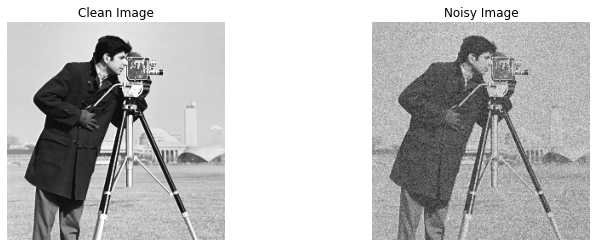

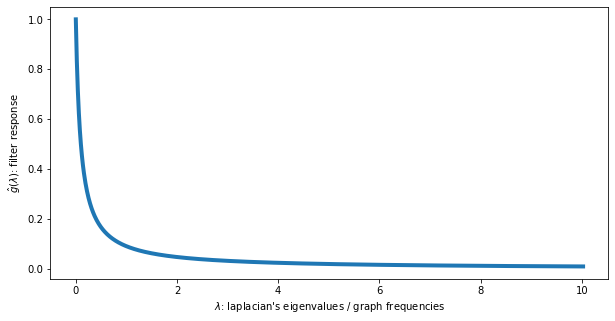

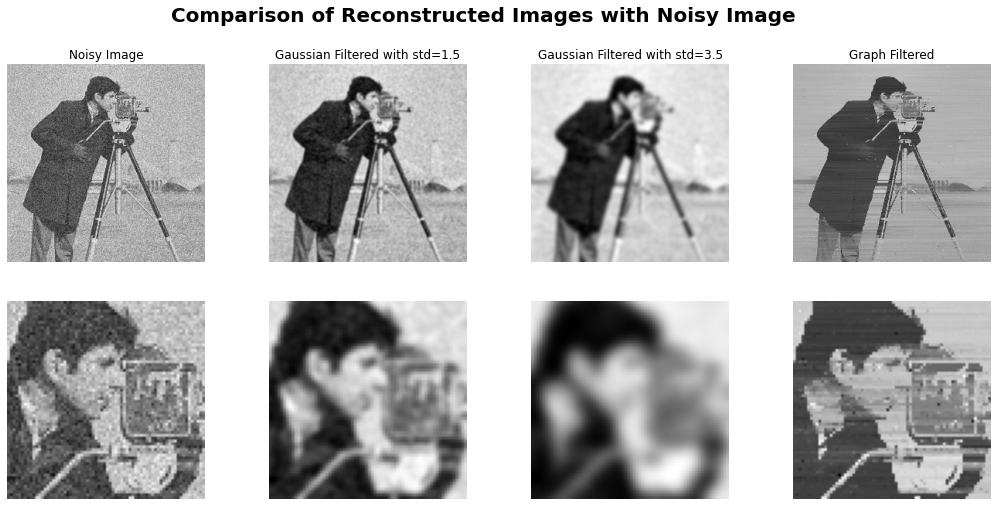

In [478]:
f = plt.imread("cman.tif") / 255.0

rs = np.random.RandomState(5)
n = rs.randn(f.shape[0], f.shape[1])*0.1
y = f + n

fig, axes = plt.subplots(1,2, figsize=(12,4))

axes[0].imshow(f, cmap="gray")
axes[1].imshow(y, cmap="gray")
axes[0].set_axis_off()
axes[1].set_axis_off()
axes[0].set_title("Clean Image")
axes[1].set_title("Noisy Image")
plt.show()

Theta = 0.1
K = 1e-5

Nx, Ny = y.shape

rows = np.concatenate([
    np.arange(Nx*Ny-1),
    np.arange(Nx*Ny-4), 
    np.arange(Nx*Ny-5), 
    np.arange(Nx*Ny-6)
])
cols = rows + np.concatenate([
    np.ones(Nx*Ny-1),
    4*np.ones(Nx*Ny-4),
    5*np.ones(Nx*Ny-5),
    6*np.ones(Nx*Ny-6)
]).astype(int)

y_1d = y.flatten()
dists = np.abs(y_1d[rows]-y_1d[cols])
data = np.exp(-(dists**2)/(2*(Theta**2)))*(dists>K)

W_csr = scipy.sparse.csr_matrix((data, (rows, cols)), shape=(Nx*Ny,Nx*Ny))
W_csr = W_csr.T + W_csr

c = np.arange(Ny)*Ny
r = c+Nx-1

rs = np.concatenate([
    r, 
    r[:-1], 
    r[:-2]
])
cs = np.concatenate([
    c,                  
    c[1:],  
    c[2:]
])
rs_final = np.concatenate([rs, cs])
cs_final = np.concatenate([cs, rs])

W_lil = W_csr.tolil()
W_lil[rs_final, cs_final] = 0


G = graphs.Graph(W_lil)
G.estimate_lmax()

"""
# Plot Graph Signal as 2D Grid Graph
xv, yv = np.meshgrid(np.arange(Nx), np.arange(Ny))
coords = np.stack([xv.flatten(), yv.flatten()], axis=1)
myGraphPlot(G, 
            coords = coords,
            title = "Graph")
"""

Lambda = 10


g = OurLPF(G, scale=Lambda)
g.plot()
s = g.filter(y.flatten(), method="chebyshev")

f_reconst = np.reshape(s, (Nx,Ny))

f_gaus1 = cv.GaussianBlur(y, (75,75), sigmaX=1.5/np.sqrt(2), sigmaY=1.5/np.sqrt(2))
f_gaus2 = cv.GaussianBlur(y, (75,75), sigmaX=3.5/np.sqrt(2), sigmaY=3.5/np.sqrt(2))

fig, axes = plt.subplots(2,4,figsize=(18,8))
axes[0,0].set_title("Noisy Image")
axes[0,0].imshow(y, cmap="gray")
axes[0,0].set_axis_off()
axes[1,0].imshow(y[20:90,100:170], cmap="gray")
axes[1,0].set_axis_off()
axes[0,1].set_title("Gaussian Filtered with std=1.5")
axes[0,1].imshow(f_gaus1, cmap="gray")
axes[0,1].set_axis_off()
axes[1,1].imshow(f_gaus1[20:90,100:170], cmap="gray")
axes[1,1].set_axis_off()
axes[0,2].set_title("Gaussian Filtered with std=3.5")
axes[0,2].imshow(f_gaus2, cmap="gray")
axes[0,2].set_axis_off()
axes[1,2].imshow(f_gaus2[20:90,100:170], cmap="gray")
axes[1,2].set_axis_off()
axes[0,3].set_title("Graph Filtered")
axes[0,3].imshow(f_reconst, cmap="gray")
axes[0,3].set_axis_off()
axes[1,3].imshow(f_reconst[20:90,100:170], cmap="gray")
axes[1,3].set_axis_off()

fig.suptitle('Comparison of Reconstructed Images with Noisy Image\n', fontsize=20, fontweight=700) # or plt.suptitle('Main title')
plt.show()

## Filtering

2. **Filtering in the Vertex Domain:**

$$
f_{out}(i) = b_{i,i} f_{in}(i) + \sum_{j \in \mathcal{N}(i,K)} b_{i,j} f_{in}(j)
$$
for some constants $\{b_{i,j}\}_{i,j \in \mathcal{V}}$. This equation tells that filtering in the vertex domain is the localized linear transform.

When the frequency filter is an order $K$ polynomial $\hat{h}(\lambda_l) = \sum_{k=0}^K a_k \lambda_l^k$ for some constants $\{a_k\}_{k=0,1,...,K}$:

$$
\begin{align}
f_{out}(i) &= \sum_{l=0}^{N-1} \hat{h}(\lambda_l) \hat{f}_{in}(\lambda_l) u_l(i) \\
&= \sum_{j=1}^N f_{in}(j) \sum_{k=0}^K a_k \sum_{l=0}^{N-1}\lambda_l^k u^*_l(j) u_l(i)
\end{align}
$$

Since $Ł = U \Lambda U^T$, we have $Ł^k = U \Lambda^k U^T$. Then, we have the following:

$$
f_{out}(i) = \sum_{j=1}^N f_{in}(j) \sum_{k=0}^K a_k (Ł^k)_{i,j}
$$

* $(Ł^k)_{i,j} = 0$ when the shortest path between vertices i and j, $d_G (i,j)>k$.

From this lemma, we have the following:

$$
f_{out}(i) = \sum_{j=1}^N f_{in}(j) \sum_{k=d_G(i,j)}^K a_k (Ł^k)_{i,j}
$$

Therefore, we have the following equation:

$$
b_{i,j} = \sum_{k=d_G(i,j)}^K a_k (Ł^k)_{i,j}
$$

So, when the frequency filter is an order K polynomial, the frequency filtered signal at vertex $i$ is linear combination of the components of the input signal at vertices within a K-hop local neighborhood of vertex $i$. This property can be useful when relating the smoothness of a filtering kernel to the localization of filtered signals in the vertex domain.

In [332]:
# TODO: Try to approximate tikhonov regularization in vertex domain

## Convolution

In classical signal processing, the convolution operator is defined as:

$$
x_{out}(f) = \int x_{in}(\tau) h(t-\tau)d\tau
$$

This equation can be written as:

$$
x_{out}(f) = \int \hat{x}_{in} (f) \hat{h} (f) e^{j 2\pi f t} df
$$

To define a generalized convolution in the graph setting, we can replace the complex exponential with graph Laplacian eigenvectors:

$$
f_{out}(i) = (f \ast h)(i) = \sum_{l=0}^{N-1} \hat{f}(\lambda_l) \hat{h}(\lambda_l) u_l(i)
$$
which enforces the property that convolution in the vertex domain is equivalent to multiplication in the graph spectral domain.

In [335]:
# TODO: Think about any implementation and what does it mean as a convolution

## Translation

The classical translation operator is:

$$
(T_{v}f)(t) = f(t-v)
$$
but we cannot directly generalize to the graph setting.

$$
(T_n g)(i) = \sqrt{N} (g \ast \delta_n)(i) = \sqrt{N} \sum_{l=0}^{N-1} \hat{g}(\lambda_l) u_l^*(n) u_l(i)
$$

**Mean of graph signal:**
$$
\sum_{i=0}^{N-1} g(i) = \sqrt{N} \sum_{i=0}^{N-1} g(i) \frac{1}{\sqrt{N}} = \sqrt{N} \sum_{i=0}^{N-1} g(i) u^*_{0}(i)
$$

where the eigenvector corresponding to eigenvalue $\lambda_0 = 0$, $u_{0}(i) = \frac{1}{\sqrt{N}}$. This property can be shown from the fact the solution of the equation $Ł u_0 = 0$.

This equation can also be written as:

$$
\sum_{i=0}^{N-1} g(i) = \sqrt{N} \hat{g}(0)
$$

Therefore, the mean of the translated graph signal is:

$$
\begin{align}
\sum_{i=0}^{N-1} (T_n g)(i) &= \sqrt{N} \widehat{(T_n g)}(0) \\
&= \sqrt{N} \sqrt{N} \hat{g}(0) u^*_0(n) \\
&= N \frac{1}{\sqrt{N}} \hat{g}(0) \\
&= \sqrt{N} \hat{g}(0) = \sum_{i=0}^{N-1} g(i)
\end{align}
$$
We can conclude that $\sqrt{N}$ constant enables the mean conservation.

**Notes on Translation:**

* The smoothness of $\hat{g}$ controls the localization of $T_n g$ around the center vertex n. Magnitude...
TODO: Finish here

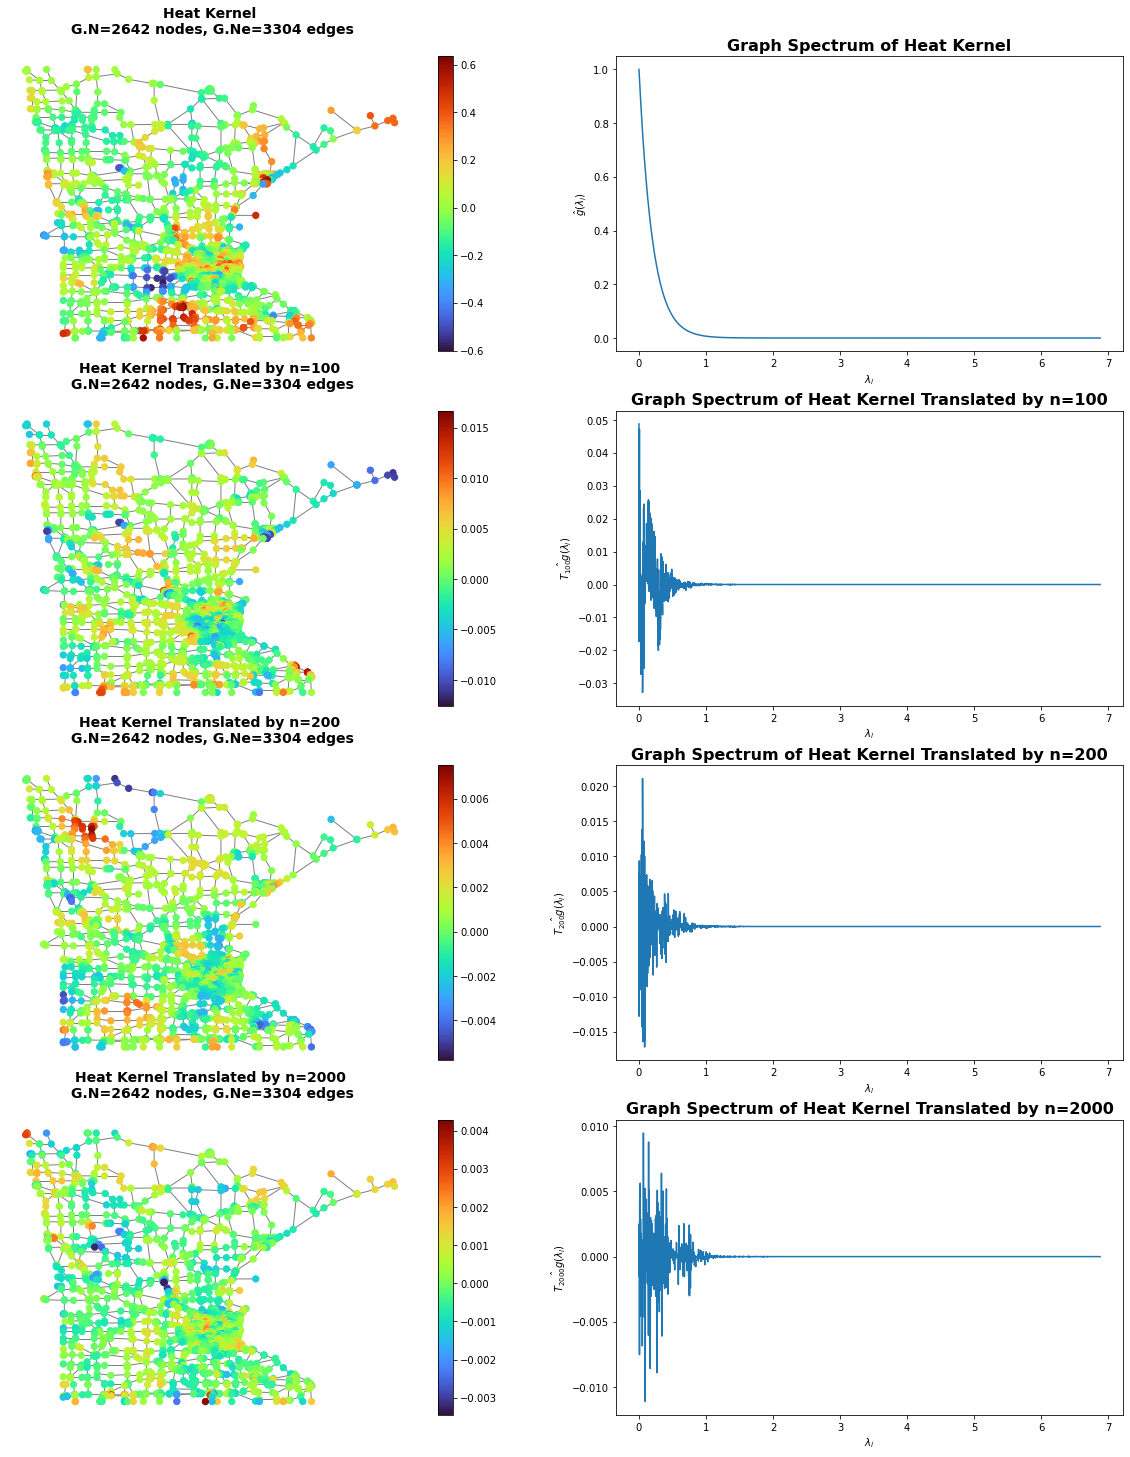

In [479]:
G = graphs.Minnesota()
G.compute_laplacian()
G.compute_fourier_basis()

s_hat = np.exp(-5*G.e)

s_hat_100 = s_hat * G.U[:,99]
s_hat_200 = s_hat * G.U[:,199]
s_hat_2000 = s_hat * G.U[:,1999]

s = G.igft(s_hat)
s_100 = G.igft(s_hat_100)
s_200 = G.igft(s_hat_200)
s_2000 = G.igft(s_hat_2000)

fig, axes = plt.subplots(4,2,figsize=(20,25))
myGraphPlotSignal(G, 
            s = s,
            title = "Heat Kernel",
            ax=axes[0,0])
axes[0,1].plot(G.e, s_hat)
axes[0,1].set_title("Graph Spectrum of Heat Kernel", fontsize=16, fontweight=600)
axes[0,1].set_xlabel("$\lambda_l$")
axes[0,1].set_ylabel("$\hat{g}(\lambda_l)$")

myGraphPlotSignal(G, 
            s = s_100,
            title = "Heat Kernel Translated by n=100",
            ax=axes[1,0])
axes[1,1].plot(G.e, s_hat_100)
axes[1,1].set_title("Graph Spectrum of Heat Kernel Translated by n=100", fontsize=16, fontweight=600)
axes[1,1].set_xlabel("$\lambda_l$")
axes[1,1].set_ylabel("$\hat{T_{100} g}(\lambda_l)$")

myGraphPlotSignal(G, 
            s = s_200,
            title = "Heat Kernel Translated by n=200",
            ax=axes[2,0])
axes[2,1].plot(G.e, s_hat_200)
axes[2,1].set_title("Graph Spectrum of Heat Kernel Translated by n=200", fontsize=16, fontweight=600)
axes[2,1].set_xlabel("$\lambda_l$")
axes[2,1].set_ylabel("$\hat{T_{200} g}(\lambda_l)$")

myGraphPlotSignal(G, 
            s = s_2000,
            title = "Heat Kernel Translated by n=2000",
            ax=axes[3,0])
axes[3,1].plot(G.e, s_hat_2000)
axes[3,1].set_title("Graph Spectrum of Heat Kernel Translated by n=2000", fontsize=16, fontweight=600)
axes[3,1].set_xlabel("$\lambda_l$")
axes[3,1].set_ylabel("$\hat{T_{2000} g}(\lambda_l)$")

plt.show()

## Modulation

In classical signal processing, the modulation is defined as follows:

$$
(M_{f_0}x)(t) = e^{j2\pi f_0 t} x(t)
$$

In Fourier domain, it results in the following equation:

$$
\widehat{M_{f_0}x}(f) = \hat{x}(f-f_0)
$$

Generalized modulation in the graph setting:

$$
(M_k g)(i) = \sqrt{N}u_k(i)g(i)
$$

Some observations...

## Dilation

In classical signal processing, the dilation is defined as follows:

$$
(\mathcal{D}_s x)(t) = \frac{1}{s} f(\frac{t}{s})
$$

In Fourier domain,
$$
(\widehat{\mathcal{D}_s x})(f) = \hat{x}(sf)
$$

The generalized dilation in the graph setting:

$$
(\widehat{\mathcal{D}_s g})(\lambda) = \hat{g}(s\lambda) 
$$

Some observations...

### Diffusion Operators and Dilation

The heat diffusion operator
$$
\textbf{R} = e^{-Ł}
$$
which is an example of a discrete diffusion operator.

Applying different powers $\tau$ of the heat diffusion operator to a signal $\textbf{f}$ describes the flow of the heat over the graph when the rates of flow are proportional to the edge weights encoded in $Ł$.

$\textbf{f}$: initial amount of heat at each vertex

$\textbf{R}^\tau\textbf{f} = e^{-\tau Ł}\textbf{f}$: amount of heat at each vertex after time $\tau$

* When $\tau$ is small, $\textbf{R}^\tau_{i,j}$ for two vertices that are far apart in the graph is very small. Therefore, $\textbf{R}^\tau \textbf{f}(i)$ depends primarily on the values $f(j)$ for vertices $j$ close to $i$ in the graph.

* As $\tau$ increases, $\textbf{R}^\tau \textbf{f}(i)$ also depends on the values of $f(j)$ for vertices $j$ farther away from $i$ in the graph.

Applying a power $\tau$ of the heat diffusion operator to any signal $\textbf{f} \in \mathbb{R}^N$ is equivalent to filtering the signal with a dilated heat kernel:

$$
\textbf{R}^\tau \textbf{f} = (e^{-\tau Ł}) \textbf{f} = \widehat{(D_\tau g)}(Ł)\textbf{f} = \textbf{f} \ast (D_\tau g)
$$

where the filter is the heat kernel $\hat{g}(\lambda_l) = e^{-\lambda_l}$.

**Exp:**

Consider a graph, then initialize a unit of energy at one vertex 100 by taking $\textbf{f} = \delta_{100}$. Then, allow it to diffuse through the network for different dyadic amounts of time and measure the amount of energy that accumulates at each vertex. Applying different powers of the heat diffusion operator can be interpreted as graph spectral filtering with a dilated kernel.

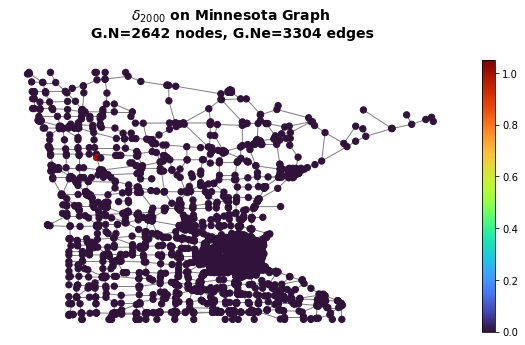

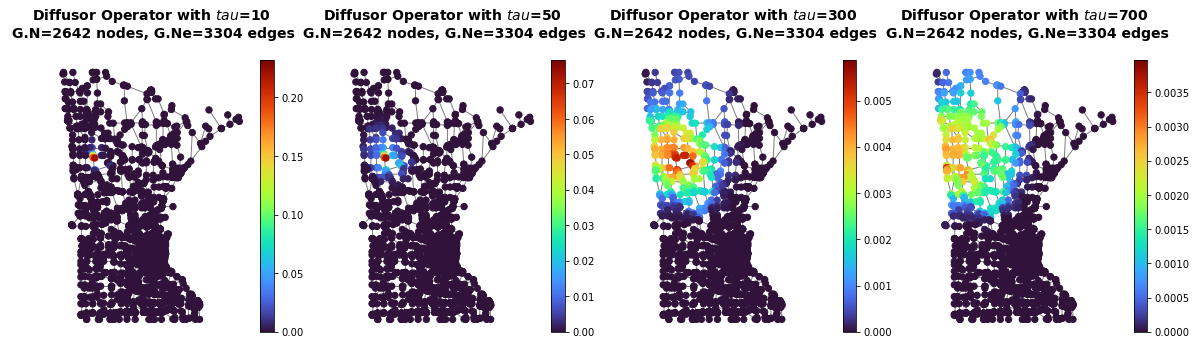

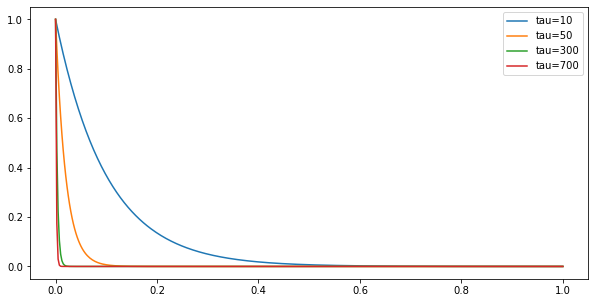

In [423]:
G = graphs.Minnesota()
G.compute_laplacian()
G.compute_fourier_basis()

imp = np.zeros(G.N)
imp[320] = 1

myGraphPlotSignal(G, 
            s = imp,
            title = "$\delta_{2000}$ on Minnesota Graph"
)

taus = [10, 50, 300, 700]
g = filters.Heat(G, taus)

s = g.filter(imp, method='chebyshev')

fig, axes = plt.subplots(1,len(taus),figsize=(20,5))
for i in range(len(taus)):
    myGraphPlotSignal(G, 
                s = s[:,i],
                title = "Diffusor Operator with $tau$="+str(taus[i]),
                ax=axes[i]
    )
plt.show()

plt.figure()
lambdas = np.linspace(0,1,400)
for i in range(len(taus)):
    plt.plot(lambdas, np.exp(-taus[i]*lambdas), label="tau="+str(taus[i]))
plt.legend()
plt.show()


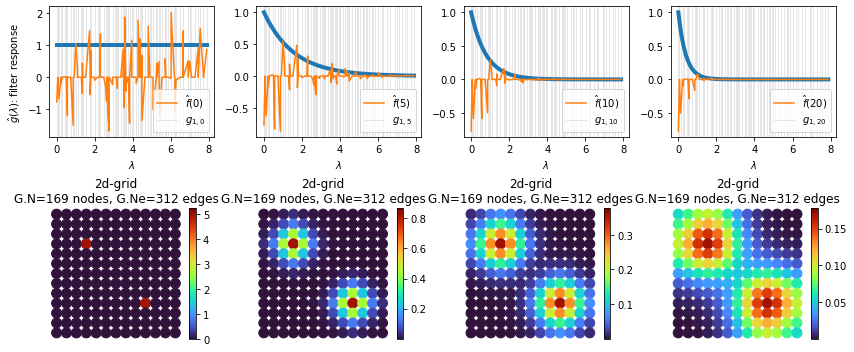

In [435]:
from os import path

import numpy as np
from matplotlib import pyplot as plt
import pygsp as pg

n_side = 13
G = pg.graphs.Grid2d(n_side)
G.compute_fourier_basis()

sources = [
    (n_side//4 * n_side) + (n_side//4),
    (n_side*3//4 * n_side) + (n_side*3//4),
]
x = np.zeros(G.N)
x[sources] = 5

times = [0, 5, 10, 20]

fig, axes = plt.subplots(2, len(times), figsize=(12, 5))
for i, t in enumerate(times):
    g = pg.filters.Heat(G, t)
    title = r'$\hat{{f}}({0}) = g_{{1,{0}}} \odot \hat{{f}}(0)$'.format(t)
    g.plot(ax=axes[0, i])
    axes[0, i].set_xlabel(r'$\lambda$')
#    axes[0, i].set_ylabel(r'$g(\lambda)$')
    if i > 0:
        axes[0, i].set_ylabel('')
    y = g.filter(x)
    line, = axes[0, i].plot(G.e, G.gft(y))
    labels = [r'$\hat{{f}}({})$'.format(t), r'$g_{{1,{}}}$'.format(t)]
    axes[0, i].legend([line, axes[0, i].lines[-3]], labels, loc='lower right')
    G.plot_signal(y, ax=axes[1, i])
    axes[1, i].set_aspect('equal', 'box')
    axes[1, i].set_axis_off()

fig.tight_layout()

## Graph Coarsening, Downsampling and Reduction

Many multiscale transforms for signals on graphs require successively coarser versions of the original graph that preserve properties of the original graph such as 
* intrinsic geometric structure
* connectivity
* graph spectral distribution
* sparsity

$$
\mathcal{G} = \{ \mathcal{V}, \mathcal{E}, W \} \rightarrow 
\mathcal{G}^{\text{reduced}} = \{ \mathcal{V}^{\text{reduced}}, \mathcal{E}^{\text{reduced}}, W^{\text{reduced}} \}
$$

This process can be split into two separate but closely related subtasks:

1. Identifying $ \mathcal{V}^{\text{reduced}}$ 

$\:\:\:\:\:\:\rightarrow$ **Downsampling**

2. Assigning edges and weights $ \mathcal{V}^{\text{reduced}}$ and $W^{\text{reduced}}$ to connect the new set of vertices 

$\:\:\:\:\:\:\rightarrow$ **Reduction**

For a bipartite graph, it's simpler.

For non-bipartite graphs, it's much more complicated. 
* Lafon and Lee proposed downsample based on diffusion distances and form new edge weights based on random walk transition probabilities
* Ron et al proposed the greedy seed selection algorithm that leverages an algebraic distance measure to downsample the vertices
...
Refer to [47] to [50] for further reviews

Observations...

More topics too...

## Localized, Multiscale Transforms for Graph Signals

Localized transform methods to analyze data on graphs:

* Wavelets on unweighted graphs for analyzing computer network traffic
* diffusion wavelets and diffusion wavelet packets
* the top-down wavelet construction
* graph dependent basis functions for sensor network graphs
* lifting-based wavelets on graphs
* multiscale wavelets on balanced trees, spectral graph wavelets
* critically sampled two-channel wavelet filter banks
* a windowed graph Fourier transform.

Feature that makes the classical wavelet transforms useful:
- Able to localize signal information in both time and frequency, thus exploit the time-frequency resolution trade-off better than Fourier Transform. So, for graph signal processing, it is to localize the graph signal contents in both the vertex and graph spectral domains.

**Spatial Spread:**

$$
\Delta^2_{\mathcal{G}, i}(\textbf{f}) = \frac{1}{||\textbf{f}||_2^2} \sum_{j \in \mathcal{V}}[d_{\mathcal{G}}(i,j)]^2[f(j)]^2
$$

where $\{ [f(j)]^2/||\textbf{f}||^2 \}_{j=1,2,...,N}$ can be interpreted as a pmf of signal $\textbf{f}$ and $\Delta^2_{\mathcal{G}, i}(\textbf{f})$ is the variance of the geodesic distance function $d_{\mathcal{G}}(i,.): \mathcal{V} \rightarrow \mathbb{R}$ at node $i$, in terms of this spatial pmf.

Then, the spatial spread can be defined as:

$$
\Delta^2_{\mathcal{G}}(\textbf{f}) = \min_{i \in \mathcal{V}}\{ \Delta_{\mathcal{G}, i}^2 (\textbf{f}) \}
$$

**Spectral Spread:**

$$
\Delta_{\sigma}^2(\textbf{f}) = \min_{\mu \in \mathbb{R}_+} \left\{ \frac{1}{||\textbf{f}||_2^2} \sum_{\lambda \in \sigma(\mathcal{L})} [\sqrt{\lambda} - \sqrt{\mu}]^2 [\hat{f}(\lambda)]^2 \right\} 
$$

where $\{[\hat{f}(\lambda)]^2/||\textbf{f}||_2^2\}_{\lambda=\lambda_0,\lambda_1,...,\lambda_{max}}$ is the pmf of $\textbf{f}$ across the spectrum of the Laplacian matrix and $\sqrt{\mu}$ and $\Delta_\sigma^2(\textbf{f})$ are the mean and variance of $\sqrt{\lambda}$, respectively.

### Vertex Domain Designs

Vertex domain designs of graph wavelet transforms are based on the spatial features of the graph such as node connectivity and distances between vertices. Examples: Random transforms, Graph Wavelets, Lifting based wavelets and Tree wavelets.

**Random Transforms** for unweighted graphs compute either a weighted average or a weighted difference at each node in the graph wrt a k-hop neighborhood around it. Thus, the filter at each node has a constant, non-zero weight $c$ within the k-hop neighborhood and zero weight outside, where $c$ is chosen so as to guarantee invertibility of the transform.

**Graph Wavelets** are functions $\varphi_{k,i} : \mathcal{V} \rightarrow \mathbb{R}$ localized wrt a range of scale/location indices $(k,i)$, which at a minimum satisfy $\sum_{j \in \mathcal{V}} \varphi_{k,i}(j)=0$

**Lifting Based Wavelets Transforms** are extensions of the lifting wavelets originally proposed for 1D signals by Sweldens. The vertex set is partitioned into sets of even and odd nodes, $\mathcal{V} = \mathcal{V}_\mathcal{O} \cup \mathcal{V}_\mathcal{E}$. Each odd node computes its prediction coefficient using its own data and data from its even neighbors. Then, each even node computes its update coefficients using its own data and the prediction coefficients of its neighboring odd nodes.

**Tree Wavelets** are constructed by building a balanced hierarchical tree from the data defined on graphs and then generating orthonormal bases for the partitions defined at each level of the tree using a modified version of the standard 1D wavelet filtering and decimation scheme.

### Graph Spectral Domain Designs

Graph spectral domain designs of graph wavelet transforms are based on the spectral features of the graph. Examples: Diffusion Wavelets, Spectral Graph Wavelets, Graph Quadrature Mirror Filter Banks.

The general idea is to construct bases that are localized in both the vertex and graph spectral domains.

**Diffusion Wavelets** are based on compressed representations of powers of a diffusion operator. The localized basis functions at each resolution level are downsampled and then orthogonalized through a variation of the Gram-Schmidt orthogonalization scheme.

**Spectral Graph Wavelets** are dilated, translated versions of a bandpass kernel designed in the graph spectral domain of the non-normalized graph Laplacian. 

**Two-channel graphQMF Filter Bank** proposed for bipartite graphs. Resulting transform is orthogonal and critically-sampled, and also yields perfect reconstruction. Analysis and synthesis filters at each scale are designed using a single prototype transfer function $\hat{h}(\hat{\lambda})$, which satisfies

$$
\hat{h}^2 (\hat{\lambda}) + \hat{h}^2 (2 - \hat{\lambda}) = 2
$$
The design extends to any arbitrary graph via a bipartite subgraph decomposition.


### Examples of Graph Wavelet Designs

**For the vertex domain design**, we use the graph wavelet transform of Crovella and Kolaczyk, (**CKWT**) as an example. 

These wavelets are based on the geodesic or shortest-path distance $d_\mathcal{G}(i,j)$. 

Define $\partial \mathcal{N}(i,\tau)$ to be the set of all vertices $j \in \mathcal{V}$ such that $d_\mathcal{G}(i,j)=\tau$.

Wavelet function $\varphi^{\text{CKWT}}_{k,i} : \mathcal{V} \rightarrow \mathbb{R}$ at scale $k$ and center vertex $i \in \mathcal{V}$ can be written as

$$
\varphi^{\text{CKWT}}_{k,i}(j) = \frac{a_{k,\tau}}{|\partial \mathcal{N}(i,\tau)|}, \:\: \forall j \in \partial \mathcal{N}(i,\tau)
$$

for some constants $\{a_{k,\tau}\}_{\tau=0,1,...,k}$

Thus, each wavelet is constant across all vertices $j \in \partial \mathcal{N}(i,\tau)$, that are the same distance from the center vertex $i$ and the value of the wavelet at the vertices in $\partial \mathcal{N}(i,\tau)$ depends on the distance $\tau$.

If $\tau > k$, then $a_{k,\tau}=0$, so that for any k, the wavelet function is exactly supported on a k-hop localized neighborhood around the center vertex $i$.

We also have $\sum_{\tau=0}^k a_{k,\tau} = 0$

The constants $a_{k,\tau}$ can be computed from any continuous wavelet function $\varphi^{[0,1)}(.)$ supported on the interval $[0,1)$ by taking $a_{k,\tau}$ to be the average of $\varphi^{[0,1)}(.)$ on the sub-intervals $I_{k,\tau} = [ \frac{\tau}{k+1}, \frac{\tau+1}{k+1}] $

In our example, the continuous Mexican hat wavelet is chosen. 

Denote the entire graph wavelet transform at a given scale $k$ as:

$$
\Phi^{\text{CKWT}}_k = [\varphi^{\text{CKWT}}_{k,1}, \varphi^{\text{CKWT}}_{k,2}, ..., \varphi^{\text{CKWT}}_{k,N} ]
$$



**For the graph spectral domain design**, we use the spectral graph wavelet transform (**SGWT**) as an example.

SGWT consists of one scaling function centered at each vertex and K wavelets centered at each vertex at scales $\{ t_1,t_2,...t_K \} \in \mathbb{R}_+$. The scaling functions are low-pass kernels:

$$
\varphi_{scal, i}^{\text{SGWT}} = T_i \textbf{h} = \hat{h}(Ł) \delta_i
$$

where $T_i$ is the generalized translation and the kernel $\hat{h}(\lambda)$ is a low-pass filter.

The wavelet at scale $t_k$ and center vertex $i$ is defined as:

$$
\varphi_{t_k, i}^{\text{SGWT}} = T_i \mathcal{D}_{t_k} \textbf{g} = \widehat{\mathcal{D}_{t_k} g}(Ł) \delta_i
$$

where $\mathcal{D}_{t_k}$ is the generalized dilation and $\hat{g}(\lambda)$ is a bandpass kernel satisfying $\hat{g}(0)=0$, $\lim_{\lambda \rightarrow \infty} \hat{g}(\lambda) = 0$ and an admissibility condition.

Denote the SGWT transform at scale $t_k$ as

$$
\Phi^{\text{SGWT}}_k = [\varphi^{\text{SGWT}}_{t_k,1}, \varphi^{\text{SGWT}}_{t_k,2}, ..., \varphi^{\text{SGWT}}_{t_k,N} ]
$$

So, the entire transform $\Phi^{\text{SGWT}} : \mathbb{R}^N \rightarrow \mathbb{R}^{N(K+1)}$:

$$
\Phi^{\text{SGWT}} = [\Phi^{\text{SGWT}}_{scal}; \Phi^{\text{SGWT}}_{t_1}; ...; \Phi^{\text{SGWT}}_{t_K} ]
$$


**Computation of Spatial and Spectral Spreads of Given Graph Wavelet Transforms:**

Unlike in the classical setting, the basis functions in a graph wavelet transform are not space-invariant; i.e., the spreads of two wavelets $\varphi_{k,i_1}$ and $\varphi_{k,i_2}$ at the same scale are not necessarily the same.

Therefore, the spatial spread of a graph transform cannot be measured by computing the spreads of only one wavelet. 

Compute the spatial spread of a transform $\Phi_k$ at a given scale $k$ by taking an average over all scale $k$ wavelet functions of the spatial spreads around each respective center vertex $i$. Similarly, the spectral spread of the graph transform also changes with location.

$$
|\hat{\Phi}_k(\lambda)|^2 = \frac{1}{N} \sum_{i=1}^N |\hat{\varphi}_{k,i}(\lambda)|^2
$$

and then take $|\hat{f}(\lambda)|^2 = |\hat{\Phi}_k(\lambda)|^2$

(256, 6)


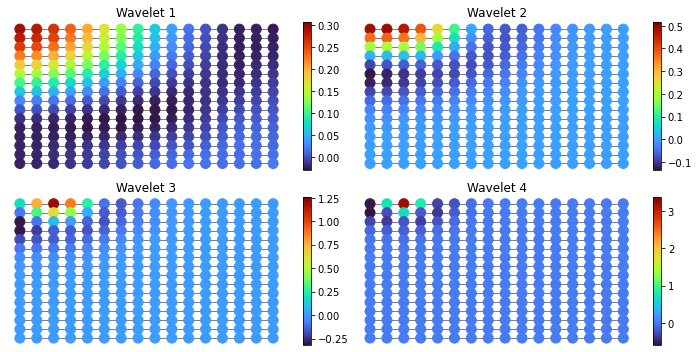

In [458]:
G = graphs.Grid2d()
G.estimate_lmax()
#myGraphPlot(G)
DELTA = 2

g = filters.MexicanHat(G, Nf=6)
s = g.localize(DELTA)
print(s.shape)

fig = plt.figure(figsize=(10, 5))
Nw = 4
for i in range(Nw):
    ax = fig.add_subplot(Nw//2, Nw//2, i+1)
    G.plot_signal(s[:, i], ax=ax)
    _ = ax.set_title('Wavelet {}'.format(i+1))
    ax.set_axis_off()
fig.tight_layout()    

[ 5 10 15 20 25 30]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

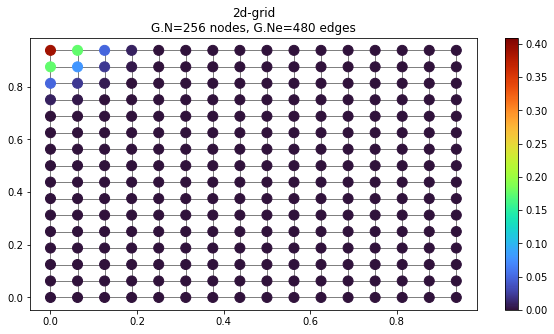

In [474]:
G = graphs.Grid2d()
G.compute_fourier_basis()

scales = np.arange(1,7)*5
print(scales)
h = filters.Heat(G, 5)

imp = np.zeros(G.N)
imp[0] = 1
print(imp)
print(np.roll(imp,1))

Phi_scal = h.filter(imp)

G.plot_signal(Phi_scal)

# Let's create SGWT_scal


AttributeError: module 'pygsp.filters' has no attribute 'Wave'

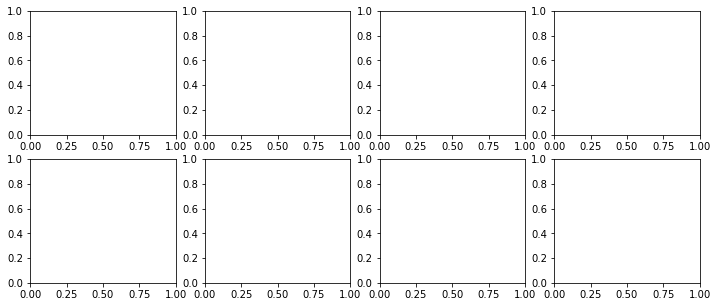

In [437]:
from os import path

import numpy as np
from matplotlib import pyplot as plt
import pygsp as pg

n_side = 13
G = pg.graphs.Grid2d(n_side)
G.compute_fourier_basis()

sources = [
    (n_side//4 * n_side) + (n_side//4),
    (n_side*3//4 * n_side) + (n_side*3//4),
]
x = np.zeros(G.N)
x[sources] = 5

times = [0, 5, 10, 20]

fig, axes = plt.subplots(2, len(times), figsize=(12, 5))
for i, t in enumerate(times):
    g = pg.filters.Wave(G, time=t, speed=1)
    title = r'$\hat{{f}}({0}) = g_{{1,{0}}} \odot \hat{{f}}(0)$'.format(t)
    g.plot(alpha=1, ax=axes[0, i], title=title)
    axes[0, i].set_xlabel(r'$\lambda$')
#    axes[0, i].set_ylabel(r'$g(\lambda)$')
    if i > 0:
        axes[0, i].set_ylabel('')
    y = g.filter(x)
    line, = axes[0, i].plot(G.e, G.gft(y))
    labels = [r'$\hat{{f}}({})$'.format(t), r'$g_{{1,{}}}$'.format(t)]
    axes[0, i].legend([line, axes[0, i].lines[-3]], labels, loc='lower right')
    G.plot(y, edges=False, highlight=sources, ax=axes[1, i], title=r'$f({})$'.format(t))
    axes[1, i].set_aspect('equal', 'box')
    axes[1, i].set_axis_off()

fig.tight_layout()

In [235]:
G = graphs.Logo()
G.estimate_lmax()
g = filters.Heat(G, tau=100)

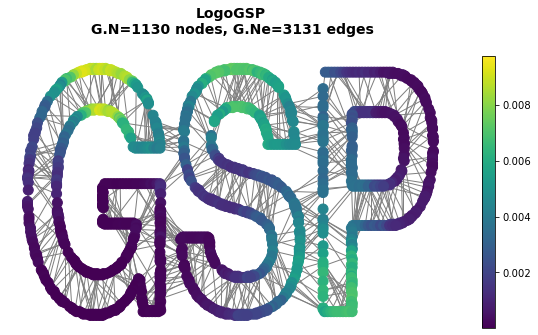

In [236]:
DELTAS = [20, 30, 1090]
s = np.zeros(G.N)
s[DELTAS] = 1
s = g.filter(s)
myGraphPlotSignal(G, s, 
                  title="LogoGSP")

## Finite-Length DT Signal

In [96]:
W = np.zeros((10,10))
for i in range(9):
    W[i,i+1] = 1
    W[i+1,i] = 1

G1 = graphs.Graph(W)

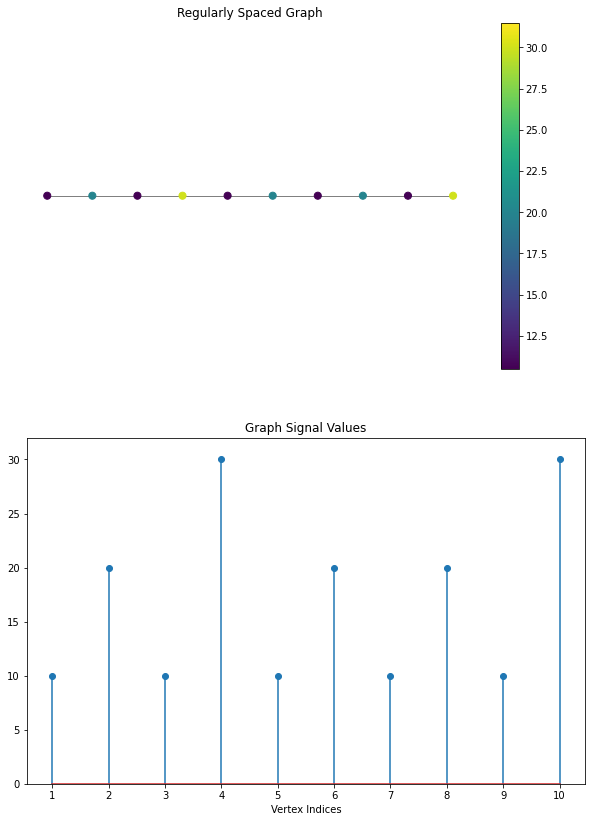

In [97]:
fig, axes = plt.subplots(2, 1, figsize=(10, 14))
G1.set_coordinates(np.array([
    [0,0],
    [1,0],
    [2,0],
    [3,0],
    [4,0],
    [5,0],
    [6,0],
    [7,0],
    [8,0],
    [9,0],
]))
f = np.array([10,20,10,30,10,20,10,20,10,30])
G1.plot_signal(f, ax=axes[0], vertex_size=50)
_ = axes[0].set_title("Regularly Spaced Graph")
axes[0].set_axis_off()
axes[1].stem(np.arange(1, 11, 1), f)
axes[1].set_xticks(np.arange(1, 11, 1))
axes[1].set_ylim([0,32])
axes[1].set_xlabel("Vertex Indices")
axes[1].set_title("Graph Signal Values")
plt.savefig("GraphSP/fig/regspaced_exp.png")
plt.show()

## Petersen Graph

In [100]:
W = np.array([
    [0,1,0,0,1,0,0,0,0,1],
    [1,0,1,0,0,1,0,0,0,0],
    [0,1,0,1,0,0,1,0,0,0],
    [0,0,1,0,1,0,0,1,0,0],
    [1,0,0,1,0,0,0,0,1,0],
    [0,1,0,0,0,0,0,1,1,0],
    [0,0,1,0,0,0,0,0,1,1],
    [0,0,0,1,0,1,0,0,0,1],
    [0,0,0,0,1,1,1,0,0,0],
    [1,0,0,0,0,0,1,1,0,0]
])
G2 = graphs.Graph(W)

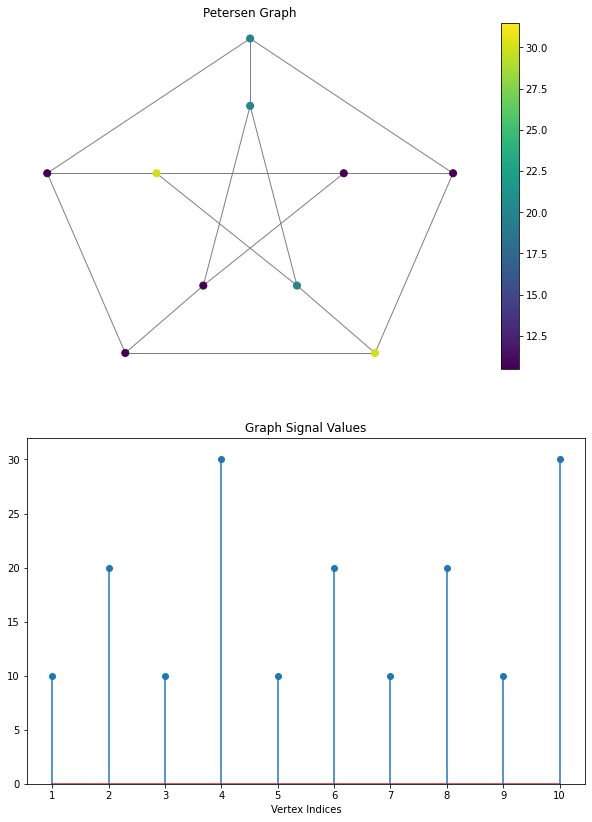

In [106]:
fig, axes = plt.subplots(2, 1, figsize=(10, 14))
G2.set_coordinates(np.array([
    [-2.5,8],
    [4,14],
    [10.5,8],
    [8,0],
    [0,0],
    [4,11],
    [7,8],
    [5.5,3],
    [2.5,3],    
    [1,8],
]))
f = np.array([10,20,10,30,10,20,10,20,10,30])
G2.plot_signal(f, ax=axes[0], vertex_size=50)
_ = axes[0].set_title("Petersen Graph")
axes[0].set_axis_off()
axes[1].stem(np.arange(1, 11, 1), f)
axes[1].set_xticks(np.arange(1, 11, 1))
axes[1].set_ylim([0,32])
axes[1].set_xlabel("Vertex Indices")
axes[1].set_title("Graph Signal Values")
plt.savefig("GraphSP/fig/petersen_exp.png")
plt.show()

In [107]:
print("Check Weights Output: \n\t", G.check_weights(), '\n')
print("Connected Output: \n\t", G.is_connected(), '\n')
print("Directed Output: \n\t", G.is_directed())

Check Weights Output: 
	 {'has_inf_val': False, 'has_nan_value': False, 'is_not_square': False, 'diag_is_not_zero': False} 

Connected Output: 
	 True 

Directed Output: 
	 False


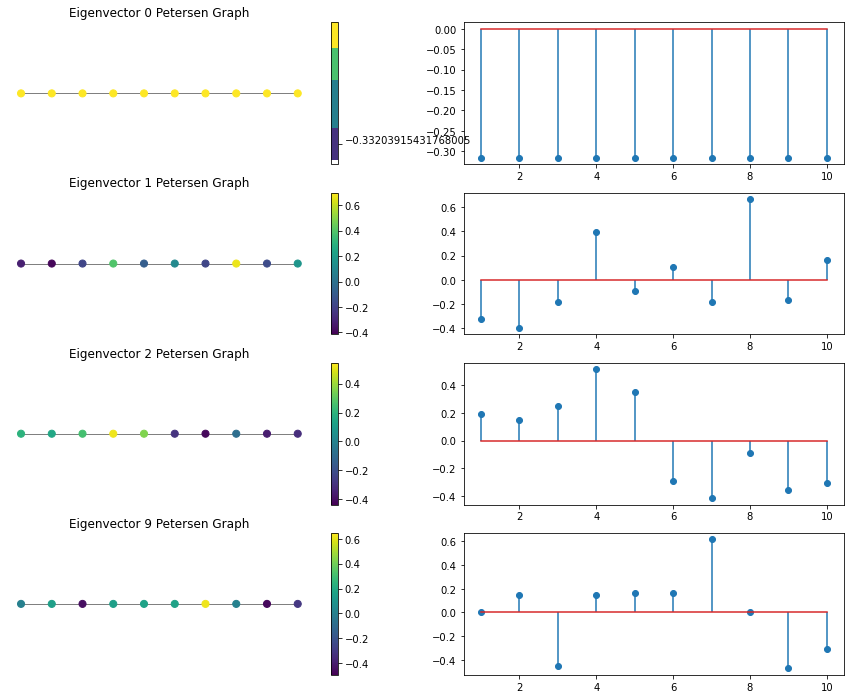

In [109]:
G.compute_fourier_basis()
fig, axes = plt.subplots(4, 2, figsize=(15, 12))

eigenval_Nums = [0,1,2,9]

for i in range(4):            
    G.plot_signal(G.U[:,eigenval_Nums[i]], ax=axes[i,0], vertex_size=50)
    _ = axes[i,0].set_title("Eigenvector {} Petersen Graph".format(eigenval_Nums[i]))
    axes[i,0].set_axis_off()
    axes[i,1].stem(np.arange(1, 11, 1), G.U[:,eigenval_Nums[i]])
